# Data Preprocessing - Elanor

In [22]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler

## Activity

In [2]:
# load in data
activity_path = "CSCI413Project/combined data/Activity Data.csv"
activity_df = pd.read_csv(activity_path)
activity_df.head()

,activity_ts,activity_type,active_Kcal,step_count,distance_m,duration_s,active_time_s,start_time_s,start_time_offset_s,met,intensity,motion_intensity_mean,motion_intensity_max,subjectID
0,01/10/2023 05:45,SEDENTARY,0,0,0.0,900,900,1696135500,3600,1.0,SEDENTARY,0.0,2.0,2301
1,01/10/2023 06:00,SEDENTARY,0,0,0.0,900,900,1696136400,3600,1.0,SEDENTARY,0.0,1.0,2301
2,01/10/2023 06:15,SEDENTARY,0,0,0.0,900,900,1696137300,3600,1.0,SEDENTARY,0.0,3.0,2301
3,01/10/2023 06:30,SEDENTARY,0,0,0.0,900,900,1696138200,3600,1.0,SEDENTARY,0.0,4.0,2301
4,01/10/2023 06:45,SEDENTARY,0,0,0.0,900,900,1696139100,3600,1.0,SEDENTARY,0.0,3.0,2301


In [3]:
activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228681 entries, 0 to 228680
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   activity_ts            228681 non-null  object 
 1   activity_type          228681 non-null  object 
 2   active_Kcal            228681 non-null  int64  
 3   step_count             228681 non-null  int64  
 4   distance_m             228681 non-null  float64
 5   duration_s             228681 non-null  int64  
 6   active_time_s          228681 non-null  int64  
 7   start_time_s           228681 non-null  int64  
 8   start_time_offset_s    228681 non-null  int64  
 9   met                    228681 non-null  float64
 10  intensity              228681 non-null  object 
 11  motion_intensity_mean  228681 non-null  float64
 12  motion_intensity_max   228681 non-null  float64
 13  subjectID              228681 non-null  int64  
dtypes: float64(4), int64(7), object(3)
m

In [4]:
# turn activity_ts into a datetime object?

In [5]:
# separate columns into numeric, nominal, and ordinal
numericCols = ["active_Kcal", "step_count", "distance_m", "duration_s", "active_time_s", "start_time_s",
               "start_time_offset_s", "met", "motion_intensity_mean", "motion_intensity_max", "subjectID"]
nominalCols = ["activity_type", "intensity"]
ordinalCols = ["activity_ts"]  # maybe

In [6]:
# check for null values
activity_df.isnull().any()

activity_ts              False
activity_type            False
active_Kcal              False
step_count               False
distance_m               False
duration_s               False
active_time_s            False
start_time_s             False
start_time_offset_s      False
met                      False
intensity                False
motion_intensity_mean    False
motion_intensity_max     False
subjectID                False
dtype: bool

In [7]:
# define function to calculate and display summary statistics for a numeric column
def display_stats(df, col):
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()
    stdDev = df[col].std()
    maximum = df[col].max()
    minimum = df[col].min()

    print(f"Stats for {col}: \nMean: {mean} \nMedian: {median} \nMode: {mode} \nStandard Deviation: {stdDev} \nMax: {maximum} \nMin: {minimum}")

In [8]:
# call stats function on each numeric column
for col in numericCols:
    display_stats(activity_df, col)
    print("\n")

Stats for active_Kcal: 
Mean: 4.357624813604978 
Median: 0.0 
Mode: 0    0
Name: active_Kcal, dtype: int64 
Standard Deviation: 12.40674444450741 
Max: 235 
Min: 0


Stats for step_count: 
Mean: 55.84334072354065 
Median: 0.0 
Mode: 0    0
Name: step_count, dtype: int64 
Standard Deviation: 196.3208925432034 
Max: 2957 
Min: 0


Stats for distance_m: 
Mean: 50.09889011330193 
Median: 0.0 
Mode: 0    0.0
Name: distance_m, dtype: float64 
Standard Deviation: 174.51073312748414 
Max: 9777.25 
Min: 0.0


Stats for duration_s: 
Mean: 906.2636598580556 
Median: 900.0 
Mode: 0    900
Name: duration_s, dtype: int64 
Standard Deviation: 398.18271184169555 
Max: 57600 
Min: 60


Stats for active_time_s: 
Mean: 595.9444991057412 
Median: 780.0 
Mode: 0    900
Name: active_time_s, dtype: int64 
Standard Deviation: 460.60439965989576 
Max: 57600 
Min: 0


Stats for start_time_s: 
Mean: 1705413501.200362 
Median: 1703581200.0 
Mode: 0    1699702200
1    1699955100
2    1699988400
3    1700038800
4  

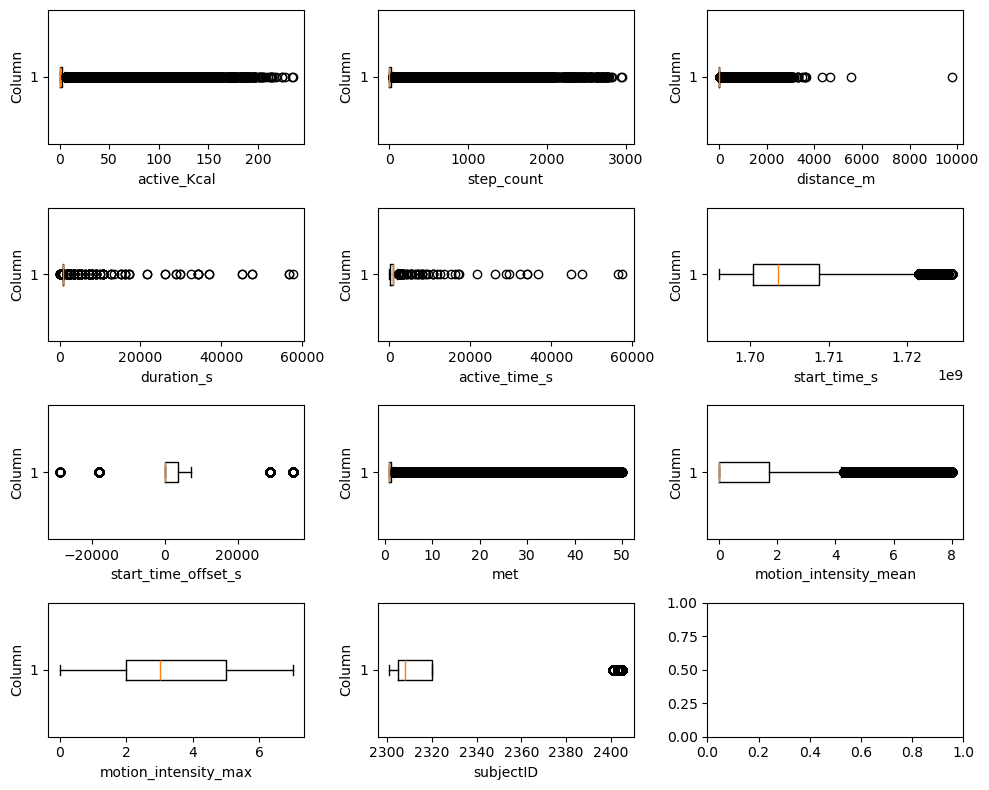

In [9]:
# box plot for each numeric column
fig, axs = plt.subplots(4, 3, figsize=(10, 8))

for i in range(len(numericCols)):
    col = numericCols[i]
    axs[i//3, i%3].boxplot(activity_df[col], vert=False);
    axs[i//3, i%3].set_xlabel(col)
    axs[i//3, i%3].set_ylabel("Column")
    
plt.tight_layout()
plt.show()

In [10]:
# look at distance outliers
outliers = activity_df[ activity_df["distance_m"] > 4000 ]
print(outliers)

             activity_ts activity_type  active_Kcal  step_count  distance_m  \
106032  03/01/2024 15:45       WALKING           25         890     9777.25   
113676  15/02/2024 19:00       WALKING            4         139     4640.25   
158117  08/11/2023 19:30       WALKING           12         146     5524.10   
170123  30/01/2024 18:00       WALKING            2         158     4335.84   

        duration_s  active_time_s  start_time_s  start_time_offset_s  \
106032         900            780    1704296700                    0   
113676         900            120    1708023600                    0   
158117         900            240    1699471800                    0   
170123         900            150    1706637600                    0   

             met intensity  motion_intensity_mean  motion_intensity_max  \
106032  2.837578    ACTIVE                    2.0                   2.0   
113676  2.566069    ACTIVE                    2.0                   2.0   
158117  3.105263  

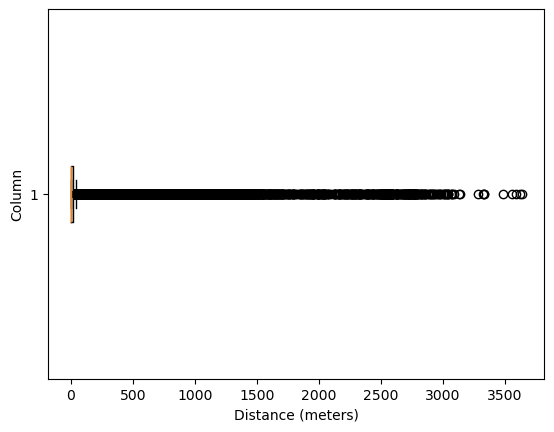

In [11]:
# remove them and show boxplot again
activity_df.drop(activity_df[ activity_df["distance_m"] > 4000 ].index, inplace=True)

plt.boxplot(activity_df["distance_m"], vert=False);
plt.xlabel("Distance (meters)")
plt.ylabel("Column")
plt.show()

In [12]:
# look at duration/active time outliers
# measurements are taken in 15 min intervals, so duration should never be greater than 900 seconds
print(activity_df[ activity_df["duration_s"] > 900 ])

             activity_ts activity_type  active_Kcal  step_count  distance_m  \
13504   24/10/2023 15:45       GENERIC            2           0        0.00   
13505   24/10/2023 15:45     SEDENTARY            5           0        0.02   
14389   31/10/2023 10:30     SEDENTARY            0           0        0.00   
15556   08/11/2023 17:30     SEDENTARY            0           0        0.00   
15689   09/11/2023 20:30       RUNNING            1          39       45.56   
...                  ...           ...          ...         ...         ...   
210960  02/05/2024 16:00     SEDENTARY            0           0        0.00   
221455  13/07/2024 09:15       WALKING            1          33       27.78   
221456  13/07/2024 09:15     SEDENTARY            0           0        0.00   
228551  31/08/2024 12:15       WALKING           20         205      172.55   
228552  31/08/2024 12:15     SEDENTARY            0           0        0.00   

        duration_s  active_time_s  start_time_s  st

In [13]:
# remove time outliers
activity_df.drop(activity_df[ activity_df["duration_s"] > 900 ].index, inplace=True)

In [14]:
# make sure our categorical columns are okay
print(activity_df["activity_type"].unique())
print(activity_df["intensity"].unique())

['SEDENTARY' 'WALKING' 'RUNNING' 'GENERIC' 'UNMONITORED'
 'WHEELCHAIR_PUSHING']
['SEDENTARY' 'ACTIVE' 'HIGHLY_ACTIVE']


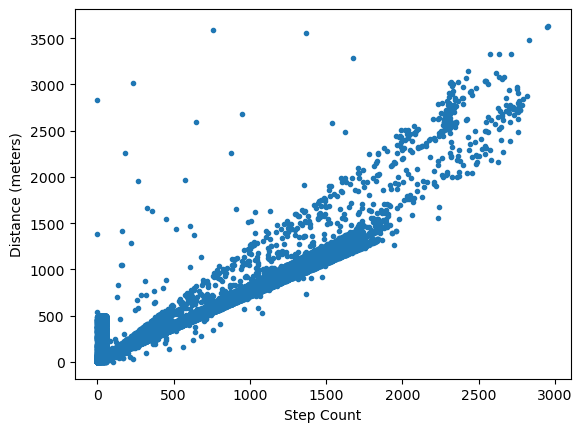

In [15]:
# plot distance vs step count
plt.plot(activity_df["step_count"], activity_df["distance_m"], '.')
plt.xlabel("Step Count")
plt.ylabel("Distance (meters)")
plt.show()

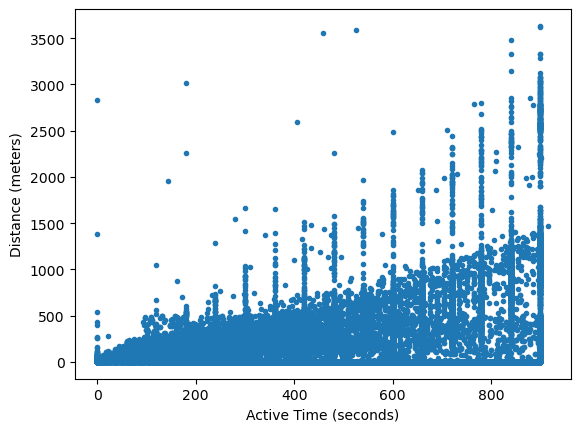

In [16]:
# plot distance vs active time
plt.plot(activity_df["active_time_s"], activity_df["distance_m"], '.')
plt.xlabel("Active Time (seconds)")
plt.ylabel("Distance (meters)")
plt.show()

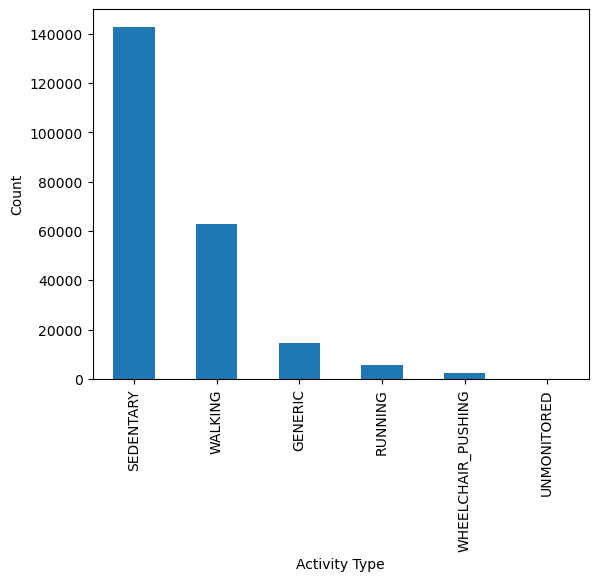

In [18]:
# count plot for activity type
counts = activity_df["activity_type"].value_counts().plot(kind="bar")
plt.xlabel("Activity Type")
plt.ylabel("Count")
plt.show()

In [20]:
# one hot encode categorical variables
activity_transformed = pd.get_dummies(activity_df, columns=nominalCols)
activity_transformed.head()

,activity_ts,active_Kcal,step_count,distance_m,duration_s,active_time_s,start_time_s,start_time_offset_s,met,motion_intensity_mean,...,subjectID,activity_type_GENERIC,activity_type_RUNNING,activity_type_SEDENTARY,activity_type_UNMONITORED,activity_type_WALKING,activity_type_WHEELCHAIR_PUSHING,intensity_ACTIVE,intensity_HIGHLY_ACTIVE,intensity_SEDENTARY
0,01/10/2023 05:45,0,0,0.0,900,900,1696135500,3600,1.0,0.0,...,2301,False,False,True,False,False,False,False,False,True
1,01/10/2023 06:00,0,0,0.0,900,900,1696136400,3600,1.0,0.0,...,2301,False,False,True,False,False,False,False,False,True
2,01/10/2023 06:15,0,0,0.0,900,900,1696137300,3600,1.0,0.0,...,2301,False,False,True,False,False,False,False,False,True
3,01/10/2023 06:30,0,0,0.0,900,900,1696138200,3600,1.0,0.0,...,2301,False,False,True,False,False,False,False,False,True
4,01/10/2023 06:45,0,0,0.0,900,900,1696139100,3600,1.0,0.0,...,2301,False,False,True,False,False,False,False,False,True


In [25]:
# standardize numeric columns
scalerStd = StandardScaler()
activity_transformed[numericCols] = scalerStd.fit_transform(activity_transformed[numericCols])

activity_transformed = pd.DataFrame(activity_transformed, columns=numericCols)

activity_transformed.head()

,active_Kcal,step_count,distance_m,duration_s,active_time_s,start_time_s,start_time_offset_s,met,motion_intensity_mean,motion_intensity_max,subjectID
0,-0.351225,-0.284337,-0.28983,0.012169,0.878764,-1.421469,0.297033,-0.237991,-0.565356,-0.761840,-0.668569
1,-0.351225,-0.284337,-0.28983,0.012169,0.878764,-1.421331,0.297033,-0.237991,-0.565356,-1.343495,-0.668569
2,-0.351225,-0.284337,-0.28983,0.012169,0.878764,-1.421193,0.297033,-0.237991,-0.565356,-0.180186,-0.668569
3,-0.351225,-0.284337,-0.28983,0.012169,0.878764,-1.421056,0.297033,-0.237991,-0.565356,0.401468,-0.668569
4,-0.351225,-0.284337,-0.28983,0.012169,0.878764,-1.420918,0.297033,-0.237991,-0.565356,-0.180186,-0.668569
